In [18]:
from jsontodf import *
from scipy import stats
import seaborn as sns

## Data exploration and analysis
This notebook aims to test some basic aspects of the data as well as test the pipeline parsing to ``Dataframe``. First, a few sanity checks:

In [2]:
test_emissions_df, test_no_emissions_df = jsontodf("compressed_test_json.json", two_returns=True)

In [3]:
test_emissions_df

,x_p,y_p,z_p,dx_p,dy_p,dz_p,en_p,dist_p,de_p,cos_p,x_c,y_c,z_c,dx_c,dy_c,dz_c,en_c
0,0.0,100.0,100.0,0.1,0.0,0.0,0.0989,206.0,0.000543,0.82945,206.0,100.0,100.0,0.121,0.973,0.195,0.000553


In [4]:
test_no_emissions_df

,x_p,y_p,z_p,dx_p,dy_p,dz_p,en_p,dist_p,de_p,cos_p


In [5]:
test_events_df = jsontodf("compressed_test_json.json", two_returns=False)

In [6]:
test_events_df

,x_p,y_p,z_p,dx_p,dy_p,dz_p,en_p,dist_p,de_p,cos_p,emission,x_c,y_c,z_c,dx_c,dy_c,dz_c,en_c
0,0.0,100.0,100.0,0.1,0.0,0.0,0.0989,206.0,0.000543,0.82945,1,206.0,100.0,100.0,0.121,0.973,0.195,0.000553


### Time for the real deal
Now let's study a few aspects of one of the given data describing interactions in the lung!

In [7]:
%%time
lung_df = jsontodf("compressed_E_0.1.json")

CPU times: total: 39.6 s
Wall time: 45 s


In [8]:
lung_df.head(50)

,x_p,y_p,z_p,dx_p,dy_p,dz_p,en_p,dist_p,de_p,cos_p,emission,x_c,y_c,z_c,dx_c,dy_c,dz_c,en_c
0,0.0,100.0,100.0,0.1,0.0,0.0,0.0989,206.00,0.000543,0.829450,1,206.00,100.0,100.0,0.121,0.9730,0.1950,0.000553
1,0.0,100.0,100.0,0.1,0.0,0.0,0.0729,791.00,0.000014,-0.960107,1,791.00,100.0,100.0,0.987,-0.0925,-0.1280,0.027100
2,0.0,100.0,100.0,0.1,0.0,0.0,0.0919,800.00,0.000042,0.539941,1,800.00,100.0,100.0,0.548,0.6300,0.5510,0.008040
3,0.0,100.0,100.0,0.1,0.0,0.0,0.0774,570.00,0.000014,-0.984238,1,570.00,100.0,100.0,0.906,0.0289,0.4220,0.022600
4,0.0,100.0,100.0,0.1,0.0,0.0,0.0978,38.30,0.000014,0.931009,1,38.30,100.0,100.0,0.325,-0.4870,0.8110,0.002180
5,0.0,100.0,100.0,0.1,0.0,0.0,0.0782,607.00,0.000042,-0.555998,1,607.00,100.0,100.0,0.900,-0.2310,0.3690,0.021800
6,0.0,100.0,100.0,0.1,0.0,0.0,0.0953,283.00,0.000042,0.824379,1,283.00,100.0,100.0,0.420,0.4370,0.7950,0.004630
7,0.0,100.0,100.0,0.1,0.0,0.0,0.0776,510.00,0.000017,-0.382179,1,510.00,100.0,100.0,0.885,0.4190,-0.2020,0.022400
8,0.0,100.0,100.0,0.1,0.0,0.0,0.0797,133.00,0.000014,-0.226209,1,133.00,100.0,100.0,0.859,0.5110,-0.0201,0.020300
9,0.0,100.0,100.0,0.1,0.0,0.0,0.0735,7.66,0.000029,-0.796440,1,7.66,100.0,100.0,0.979,-0.2020,-0.0190,0.026500


We first divert our attention the distribution of emissions.

In [10]:
lung_total = len(lung_df)

In [11]:
emissions_total = len(lung_df[lung_df["emission"] == 1])

In [12]:
p_emission = emissions_total/lung_total
print(f"Probability of a collision is {p_emission}.")

Probability of a collision is 0.948436107645696.


Is there a correlation between incoming particle parameters and the presence (or not) of an emission?

In [13]:
stats.spearmanr(lung_df["en_p"], lung_df["emission"])

SpearmanrResult(correlation=-0.38278053809770546, pvalue=0.0)

In [14]:
stats.spearmanr(lung_df["dist_p"], lung_df["emission"])

SpearmanrResult(correlation=-0.15414754867947256, pvalue=0.0)

Notice the extremely small p-values (0 in fact), thanks to the size of our dataset. Thus we can extremely confidently reject the hypothesis that incoming energy and travelled distance are uncorrelated from emission - which makes sense.

Now for the correlations with the outputs:

In [15]:
stats.spearmanr(lung_df["de_p"], lung_df["emission"])

SpearmanrResult(correlation=0.3886767885416067, pvalue=0.0)

In [16]:
stats.spearmanr(lung_df["cos_p"], lung_df["emission"])

SpearmanrResult(correlation=-0.3402118444704425, pvalue=0.0)

Here again, no surprises that the fact an emission happened has major impact on the energy delta and the rotation of the incoming particle.

Let's have a look at a few other basic distributions.

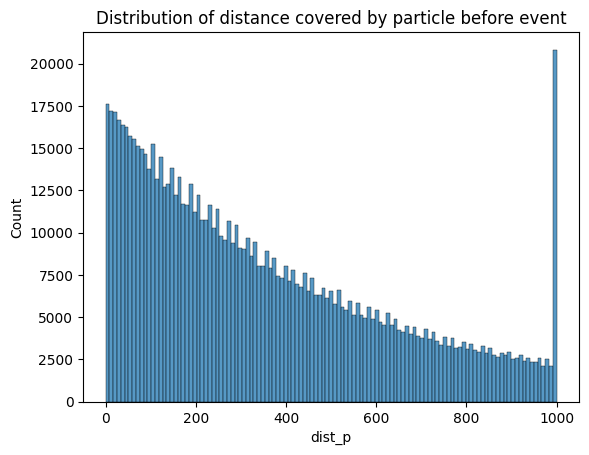

In [42]:
sns.histplot(lung_df["dist_p"]).set(title="Distribution of distance covered by particle before event");

The spike at $1000$ corresponds to the step limit, i.e to the max distance a particle can cover in a step.

In [23]:
step_limit_df = lung_df[lung_df['dist_p'] == lung_df['dist_p'].max()]

In [25]:
step_limit_count = len(step_limit_df)
p_step_limit = step_limit_count/lung_total
print(f"Probability of reaching the step limit: {p_step_limit}")

Probability of reaching the step limit: 0.020865264658706112


In [27]:
emissions_when_step_limit = len(step_limit_df[step_limit_df["emission"] == 1])
p_emission_cond_step_limit = emissions_when_step_limit/step_limit_count
print(f"Probability of emission when reaching step limit (i.e P(emission | step_limit reached)): {p_emission_cond_step_limit}")

Probability of emission when reaching step limit (i.e P(emission | step_limit reached)): 0.0073136878069613494


Let's understand whether the distance covered follows a power law or an exponential distribution, by looking at the plot in log-log:

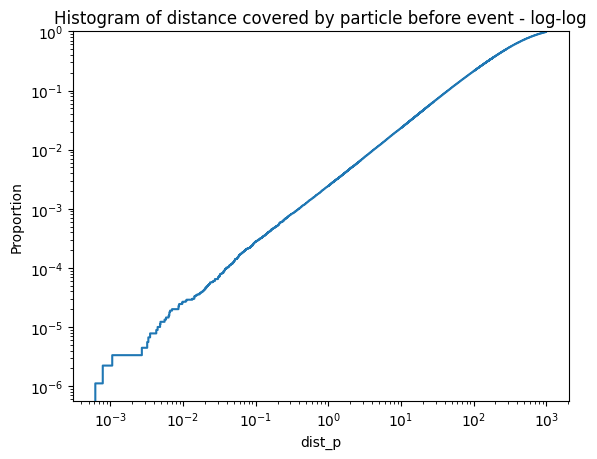

In [30]:
sns.ecdfplot(lung_df["dist_p"], log_scale=(True,True)).set(title="ECDF of distance covered by particle before event - log-log");

Data looks quite linear on a log-log, indicating a possible exponential distribution. Let's test that:

In [31]:
stats.kstest(lung_df['dist_p'], "expon")

KstestResult(statistic=0.9835588203173149, pvalue=0.0)

Test says ``dist_p`` is not exponentially distributed, interestingly. Could that be because of the lack of accuracy for small distances? (smaller than $10^{-2}$)

In [32]:
stats.kstest(lung_df[lung_df['dist_p'] > 0.01]['dist_p'], "expon")

KstestResult(statistic=0.983585175869423, pvalue=0.0)

Looks like the hypothesis of an exponential distribution is to be reject, and that the distance covered actually follows a power law.

Now, let's look at the particle rotation:

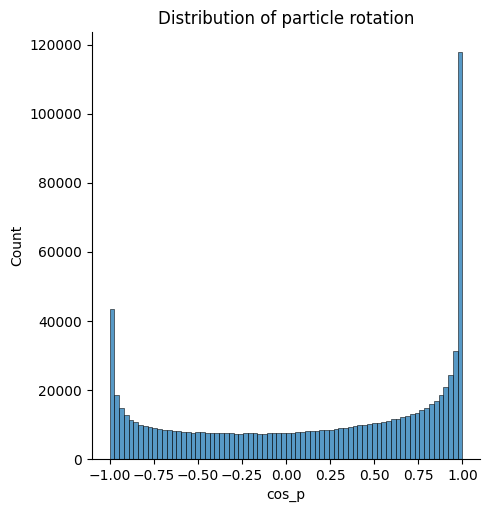

In [38]:
sns.displot(lung_df['cos_p']).set(title="Distribution of particle rotation");

Rotation seems roughly centered at $0$ degrees, with an additive delta at $0$ maybe due to particles that do not emit any other ones? Let's check that:

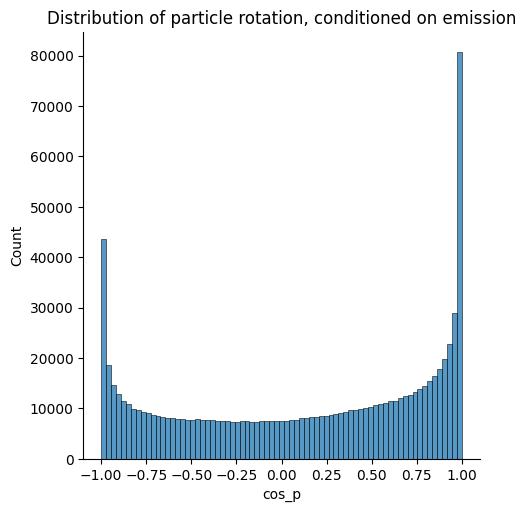

In [39]:
sns.displot(lung_df[lung_df['emission'] == 1]['cos_p']).set(title="Distribution of particle rotation, conditioned on emission");

Don't forget looking at the y-axis. Indeed the spike at $0$ degree rotation has diminished, although not by that much. Let's quickly check that particles that do not emit a new one are not rotated much:

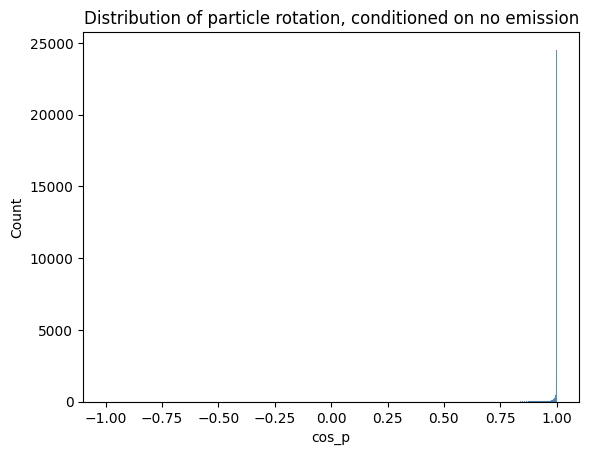

In [41]:
sns.histplot(lung_df[lung_df['emission'] == 0]['cos_p']).set(title="Distribution of particle rotation, conditioned on no emission");